In [14]:
# HIDDEN
import warnings
# Ignore numpy dtype warnings. These warnings are caused by an interaction
# between numpy and Cython and can be safely ignored.
# Reference: https://stackoverflow.com/a/40846742
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 9)
pd.set_option('precision', 2)
# This option stops scientific notation for pandas
# pd.set_option('display.float_format', '{:.2f}'.format)

In [15]:
# HIDDEN
def df_interact(df, nrows=7, ncols=7):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + nrows, col:col + ncols]

    row_arg = (0, len(df), nrows) if len(df) > nrows else fixed(0)
    col_arg = ((0, len(df.columns), ncols)
               if len(df.columns) > ncols else fixed(0))
    
    interact(peek, row=row_arg, col=col_arg)
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

def display_df(df, rows=pd.options.display.max_rows,
               cols=pd.options.display.max_columns):
    with pd.option_context('display.max_rows', rows,
                           'display.max_columns', cols):
        display(df)

## Predictions

In [74]:
mpg = sns.load_dataset('mpg').dropna()
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
...,...,...,...,...,...,...,...,...,...
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


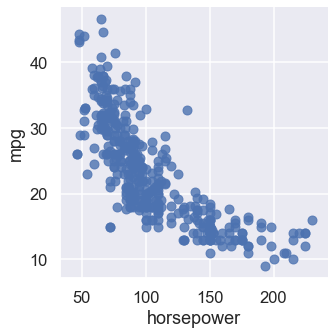

In [75]:
sns.lmplot(x='horsepower', y='mpg', data=mpg, fit_reg=False)

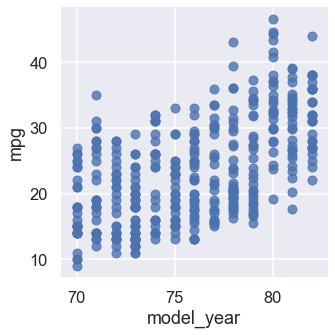

In [76]:
sns.lmplot(x='model_year', y='mpg', data=mpg, fit_reg=False)

In [77]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
...,...,...,...,...,...,...,...,...,...
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [78]:
cols = ['bias', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
X = mpg.assign(bias=1)[cols]
X

,bias,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1,8,307.0,130.0,3504,12.0,70
1,1,8,350.0,165.0,3693,11.5,70
2,1,8,318.0,150.0,3436,11.0,70
...,...,...,...,...,...,...,...
395,1,4,135.0,84.0,2295,11.6,82
396,1,4,120.0,79.0,2625,18.6,82
397,1,4,119.0,82.0,2720,19.4,82


In [79]:
y = mpg['mpg']
y

0      18.0
1      15.0
2      18.0
       ... 
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [102]:
def fit_linear(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [103]:
theta = fit_linear(X, y)
theta

0   -1.45e+01
1   -3.30e-01
2    7.68e-03
3   -3.91e-04
4   -6.79e-03
5    8.53e-02
6    7.53e-01
dtype: float64

In [81]:
pd.DataFrame({
    'col': cols,
    'weight': theta,
})

,col,weight
0,bias,-1.45e+01
1,cylinders,-3.30e-01
2,displacement,7.68e-03
3,horsepower,-3.91e-04
4,weight,-6.79e-03
5,acceleration,8.53e-02
6,model_year,7.53e-01


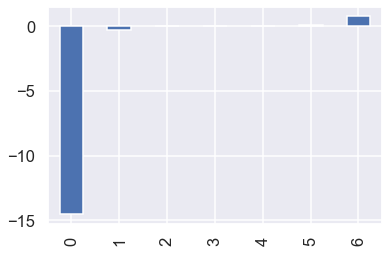

In [82]:
theta.plot.bar()

What do we make of this?

In [83]:
X

,bias,cylinders,displacement,horsepower,weight,acceleration,model_year
0,1,8,307.0,130.0,3504,12.0,70
1,1,8,350.0,165.0,3693,11.5,70
2,1,8,318.0,150.0,3436,11.0,70
...,...,...,...,...,...,...,...
395,1,4,135.0,84.0,2295,11.6,82
396,1,4,120.0,79.0,2625,18.6,82
397,1,4,119.0,82.0,2720,19.4,82


In [84]:
predictions = X.values @ theta
predictions

array([15.08, 14.07, 15.54, ..., 32.32, 30.56, 29.98])

In [87]:
comparison = pd.DataFrame({
    'n': np.arange(len(y)),
    'y': y,
    'yhat': predictions,
    'resid': y - predictions,
})
comparison

,n,y,yhat,resid
0,0,18.0,15.08,2.92
1,1,15.0,14.07,0.93
2,2,18.0,15.54,2.46
...,...,...,...,...
395,389,32.0,32.32,-0.32
396,390,28.0,30.56,-2.56
397,391,31.0,29.98,1.02


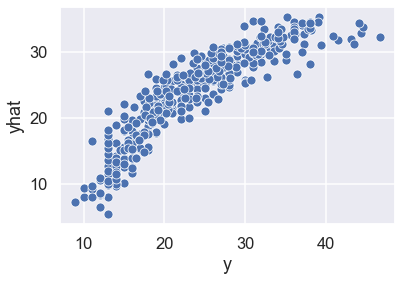

In [86]:
sns.scatterplot('y', 'yhat', data=comparison)

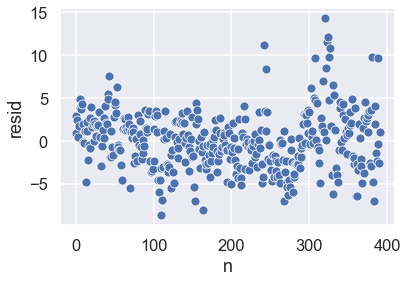

In [88]:
sns.scatterplot('n', 'resid', data=comparison)

## Polynomial Regression

In [101]:
hp = pd.DataFrame({
    'bias': 1,
    'hp': mpg['horsepower'],
    'hp^2': mpg['horsepower']**2,
})
hp

,bias,hp,hp^2
0,1,130.0,16900.0
1,1,165.0,27225.0
2,1,150.0,22500.0
...,...,...,...
395,1,84.0,7056.0
396,1,79.0,6241.0
397,1,82.0,6724.0


In [104]:
quad = fit_linear(hp, y)
quad

0    5.69e+01
1   -4.66e-01
2    1.23e-03
dtype: float64

In [109]:
pred = hp.values @ quad
pred

array([17.09, 13.48, 14.66, ..., 26.42, 27.75, 26.95])

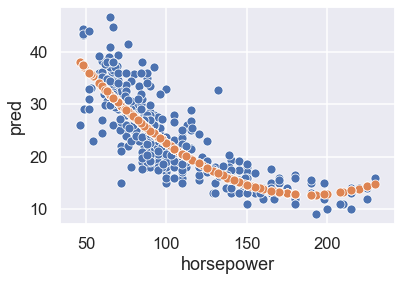

In [113]:
sns.scatterplot('horsepower', 'mpg', data=mpg)
sns.scatterplot('horsepower', 'pred', data=mpg.assign(pred=pred))

## One-Hot Encoding

In [114]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
...,...,...,...,...,...,...,...,...,...
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


In [116]:
mpg['origin'].value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

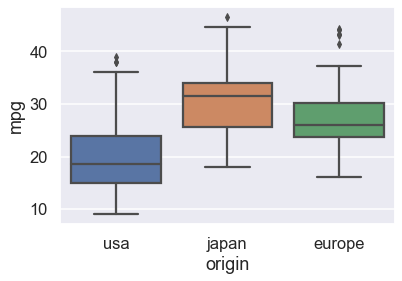

In [118]:
sns.boxplot(x='origin', y='mpg', data=mpg);

In [138]:
origs = mpg.loc[np.arange(0, 400, 10), 'origin']
origs

0         usa
10        usa
20     europe
        ...  
370       usa
380     japan
390     japan
Name: origin, Length: 40, dtype: object

In [141]:
hot = pd.DataFrame({
    'bias': 1,
    'origin=usa': (origs == 'usa').astype(int),
    'origin=europe': (origs == 'europe').astype(int),
    'origin=japan': (origs == 'japan').astype(int),
})
hot

,bias,origin=usa,origin=europe,origin=japan
0,1,1,0,0
10,1,1,0,0
20,1,0,1,0
...,...,...,...,...
370,1,1,0,0
380,1,0,0,1
390,1,0,0,1
